In [190]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, exp, pi, inf, trapz
from numpy.fft import *
import random

In [191]:
a = 9
b = 0
c = 8
d = 9
t1, t2 = -7, 7

In [192]:
g = lambda t: a if (t < t2 and t > t1) else 0

In [193]:
def u(a, b, c, d, t):
  t1, t2 = -7, 7
  g = lambda t: a if (t < t2 and t > t1) else 0
  return g(t) + b * (random.uniform(0, 1) - 0.5) + c * np.sin(d * t)

In [194]:
time = np.linspace(0, 9, 1000)

In [195]:
U_time = [u(a, b, c, d, t) for t in time]
G_time = [g(t) for t in time]

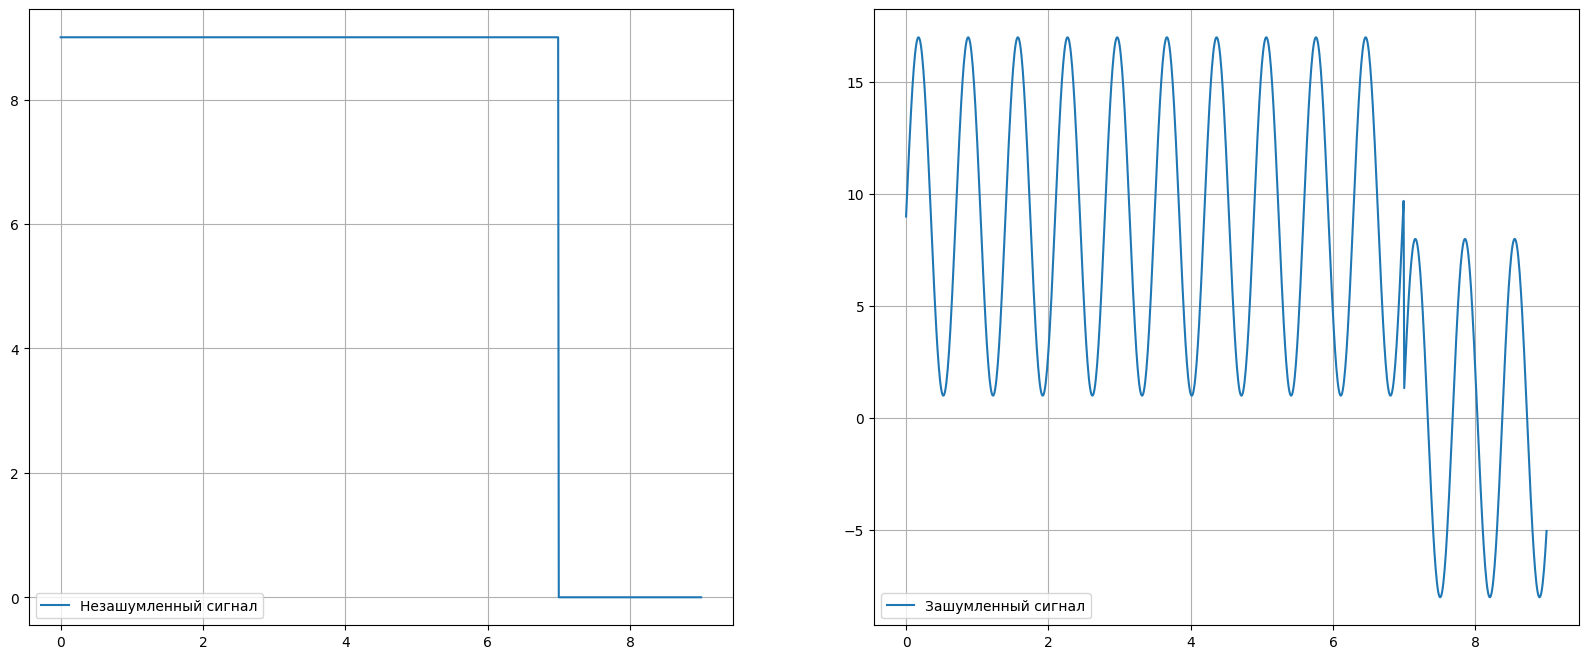

In [196]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

ax[0].plot(time, G_time, label="Незашумленный сигнал")
ax[1].plot(time, U_time, label="Зашумленный сигнал")

ax[0].grid()
ax[0].legend()

ax[1].grid()
ax[1].legend()

In [197]:
U_fft = fftshift(fft(U_time))
G_fft = fftshift(fft(G_time))

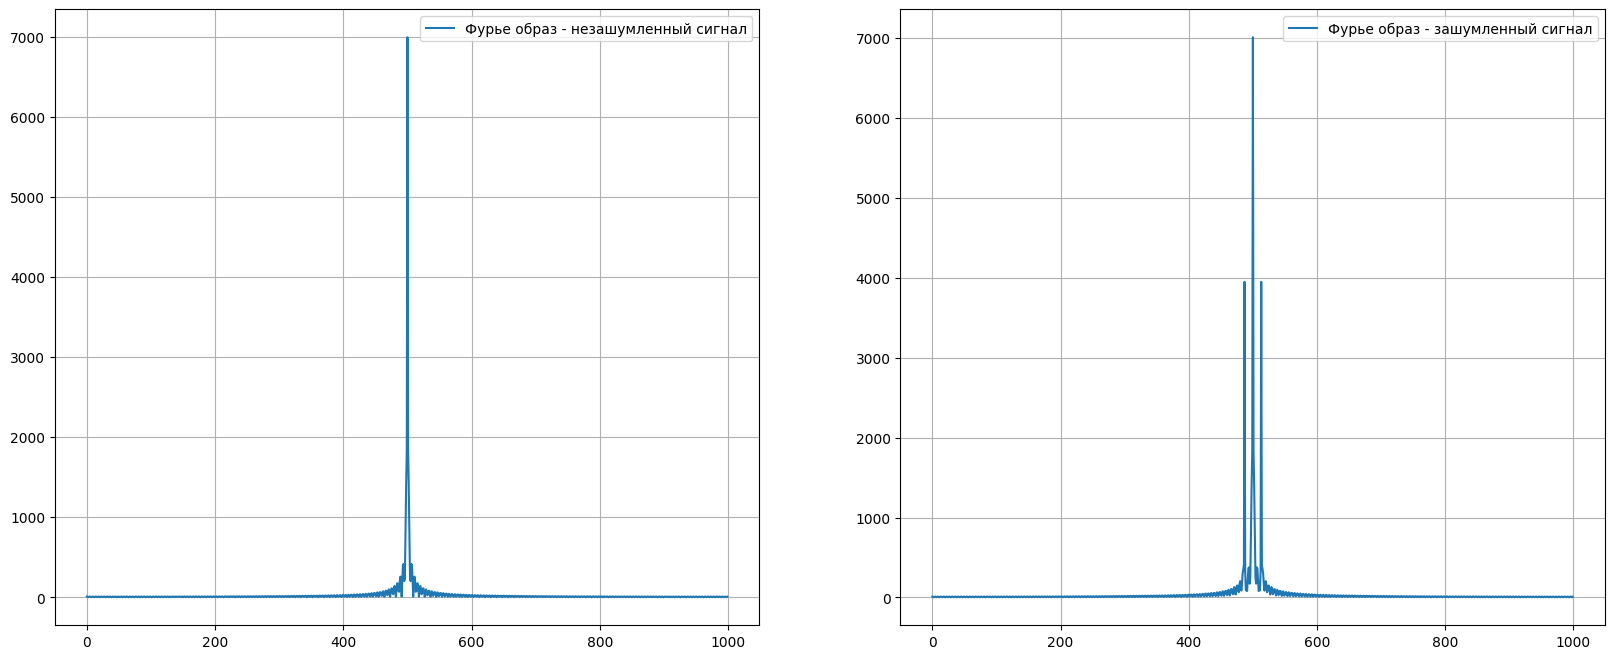

In [198]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

ax[0].plot(np.abs(G_fft), label="Фурье образ - незашумленный сигнал")
ax[1].plot(np.abs(U_fft), label="Фурье образ - зашумленный сигнал")


for k in range(2):
  ax[k].legend()
  ax[k].grid(True)

plt.show()
None

In [199]:
from scipy import signal

In [200]:
def plot_fourier_images_in_comparison(original_signal, filtered_signal, domain):
  original_fourier = fftshift(fft(original_signal))
  filtered_fourier = fftshift(fft(filtered_signal))
  freqs = fftshift(fftfreq(len(original_signal)))
  plot_in_comparison(np.abs(original_fourier), np.abs(filtered_fourier), freqs, "Фурье-образ исходного сигнала", 'Фурье-образ отфильтрованного сигнала', "Сравнение образов Фурье")

In [201]:
def plot_transfer_function_module(transfer_function):
  t, y = signal.freqresp(transfer_function)
  fig, ax = plt.subplots()
  ax.plot(t, np.abs(y))
  plt.grid(True)
  plt.title("Модуль АЧХ")
  plt.show()

In [202]:
def plot_in_comparison(original_signal, filtered_signal, domain, label_1, label_2, title):
  fig, ax = plt.subplots(1, 2, figsize=(15,5))
  ax[0].plot(domain, original_signal, label=label_1)
  ax[1].plot(domain, filtered_signal, label=label_2)
  for k in range(2):
    ax[k].grid()
    ax[k].legend()
  plt.title(title)
  plt.show()

In [203]:
def filter_signal(function_time, T1, T2, T3, time):
  transfer_function = signal.TransferFunction([T1 * T1, 2 * T1, 1], [T2 * T3, (T2 + T3), 1])
  t, out, _ = signal.lsim(transfer_function, function_time, time)
  plot_in_comparison(function_time, out, t, 'Исходный, зашумленный сигнал', "Сигнал после фильтрации", f"T1 = {T1}, T2={T2}, T3={T3}")
  plot_fourier_images_in_comparison(function_time, out, t)
  plot_transfer_function_module(transfer_function)
  return t, out


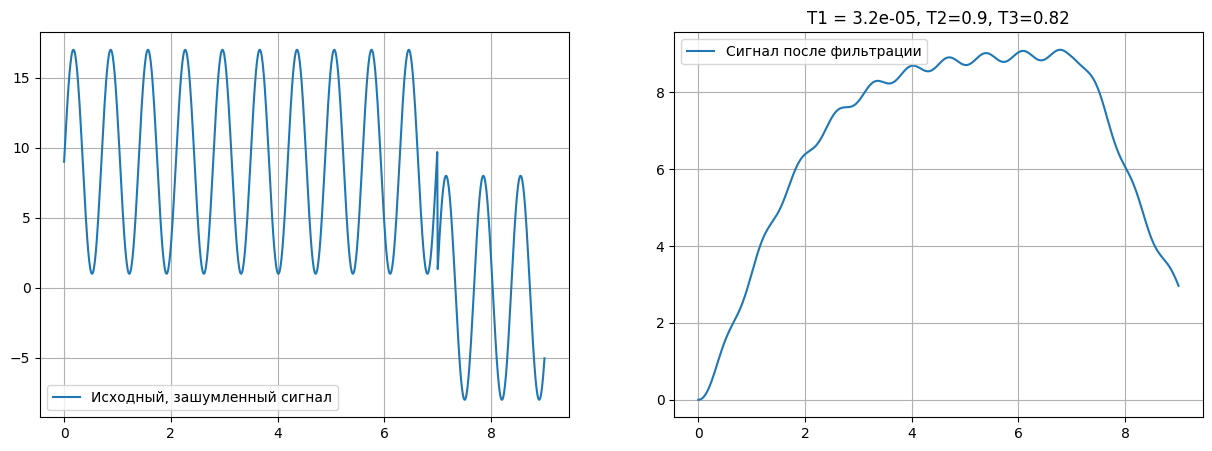

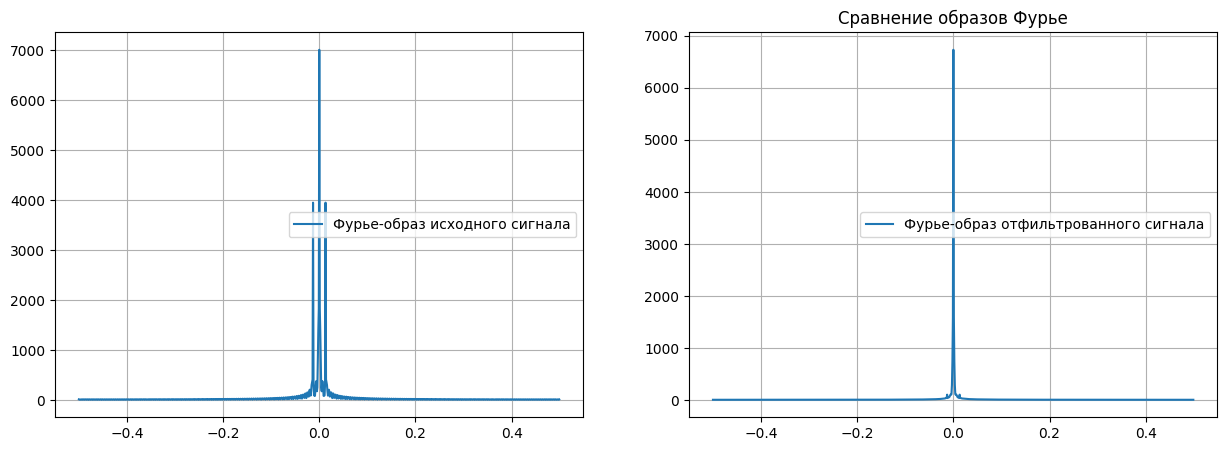

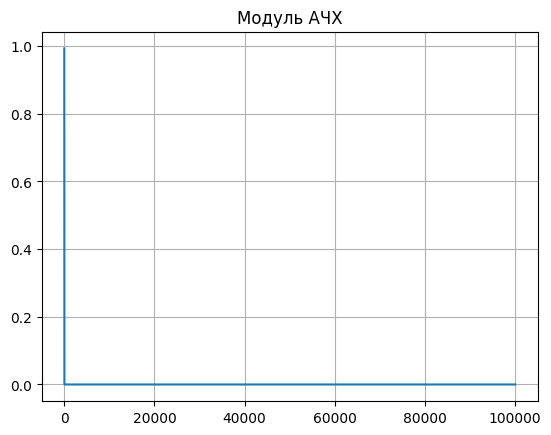

In [225]:
new_u = lambda t: u(9, b, c, d, t)
new_U_time = [new_u(k) for k in time]
filter_signal(new_U_time, 0.000032,0.9,0.82, time)
None